In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
tt=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Fresh Start\max_cons_tt.csv')
submission=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Fresh Start\submission_sarima_v2.csv')
final_df=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Fresh Start\final_df.csv')

In [61]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

class TimeSeriesPipeline:
    def __init__(self, data, merchant_id, category):
        self.data = data
        self.merchant_id = merchant_id
        self.category = category
        self.model = None
       
    
            
    def preprocess_data(self):
        self.data = self.data.query(f"category=={self.category} & merchant_id == '{self.merchant_id}'")[['date', 'net_payment_count']]
        self.data.set_index('date', inplace=True)
        if self.data.empty:
            print(f"No data found for merchant_id {self.merchant_id} and category {self.category}")
        return self.data

    def check_stationarity_and_transform(self):
    
      
        self.data_column = 'net_payment_count'
    
        

    def fit_model(self):
        # Adjust model parameters as needed
        self.model = SARIMAX(self.data[self.data_column], order=(1, 1, 1), seasonal_order=(1, 1, 1,12))
        self.model = self.model.fit()

            
    def plot_test(self):

        
        self.start_val_index=self.data.shape[0]-6
        self.end_val_index=self.data.shape[0]-4
        self.data['forecast']=self.model.predict(start=self.start_val_index,end=self.end_val_index,dynamic=True)
        self.data[['net_payment_count','forecast']].plot(figsize=(12,8),label=self.merchant_id)
        


    def forecast(self,months_future):
        self.start_forecast_index=self.data.shape[0]-3
        self.end_forecast_index=self.data.shape[0]-1
        #
        self.forecast_preds = self.model.predict(start=self.start_forecast_index, end=self.end_forecast_index,dynamic=True)
        return self.forecast_preds
        

    def append_to_submission(self,submission):
        self.forecast_array=self.forecast_preds.values
        self.submission=submission
        merchant_filter=self.submission['merchant_id']==self.merchant_id

        if sum(merchant_filter)==len(self.forecast_array):
            self.submission.loc[merchant_filter,'net_payment_count']= self.forecast_array
        else:
            print("Length mismatch: cannot assign values")

        return self.submission

    def append_to_tt(self,final_df):
        self.final_df=final_df
        self.forecast_preds=self.forecast_preds.to_dict()
        # Filter to only include rows where the date is in your forecast_pred dictionary
        valid_dates = self.final_df['date'].isin(self.forecast_preds.keys())

        # Apply the mapping only to these rows
        self.final_df.loc[valid_dates & (self.final_df['merchant_id'] == 'merchant_23104'), 'net_payment_count'] = self.final_df['date'].map(self.forecast_preds)
        return self.final_df


        

    def run(self,months_future,submission,final_df,error_merchants):
        try:
      
            self.preprocess_data()
            self.check_stationarity_and_transform()
            self.fit_model()
            self.plot_test()
            self.forecast(months_future)
            return self.append_to_submission(submission), self.append_to_tt(final_df),error_merchants
        except:
            print(f'Error Happened on {self.merchant_id}')
            error_merchants.append(self.merchant_id)
            return submission,final_df,error_merchants


{'merchant_10636',
 'merchant_11613',
 'merchant_12557',
 'merchant_14939',
 'merchant_15247',
 'merchant_156',
 'merchant_17181',
 'merchant_1804',
 'merchant_18518',
 'merchant_20502',
 'merchant_2306',
 'merchant_23414',
 'merchant_23463',
 'merchant_24700',
 'merchant_27742',
 'merchant_28200',
 'merchant_28887',
 'merchant_29154',
 'merchant_29871',
 'merchant_31800',
 'merchant_32516',
 'merchant_32640',
 'merchant_33439',
 'merchant_34837',
 'merchant_36608',
 'merchant_37079',
 'merchant_37101',
 'merchant_39289',
 'merchant_40101',
 'merchant_40127',
 'merchant_4028',
 'merchant_40359',
 'merchant_40495',
 'merchant_40644',
 'merchant_40709',
 'merchant_43657',
 'merchant_43935',
 'merchant_44284',
 'merchant_44923',
 'merchant_45148',
 'merchant_4565',
 'merchant_45833',
 'merchant_46022',
 'merchant_46348',
 'merchant_465',
 'merchant_46837',
 'merchant_47083',
 'merchant_47196',
 'merchant_47865',
 'merchant_47888',
 'merchant_47966',
 'merchant_481',
 'merchant_48304',
 'merchant_48918',
 'merchant_48942',
 'merchant_50291',
 'merchant_50546',
 'merchant_51358',
 'merchant_520',
 'merchant_52733',
 'merchant_53534',
 'merchant_53770',
 'merchant_55649',
 'merchant_55913',
 'merchant_58769',
 'merchant_59128',
 'merchant_59941',
 'merchant_60077',
 'merchant_60394',
 'merchant_61667',
 'merchant_61791',
 'merchant_6231',
 'merchant_62350',
 'merchant_63600',
 'merchant_65651',
 'merchant_66588',
 'merchant_67399',
 'merchant_699',
 'merchant_7302'}

In [62]:
final_df[final_df.merchant_id=='merchant_11613']

,date,merchant_id,net_payment_count,is_train,category,flag,active_months,max_consecutive
6256,2023-08-01,merchant_11613,87.0,True,135.0,1.0,2.0,2.0
6257,2023-09-01,merchant_11613,49.0,True,135.0,1.0,2.0,2.0
6258,2023-10-01,merchant_11613,0.0,False,135.0,1.0,2.0,2.0
6259,2023-11-01,merchant_11613,0.0,False,135.0,1.0,2.0,2.0
6260,2023-12-01,merchant_11613,0.0,False,135.0,1.0,2.0,2.0


c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. Al

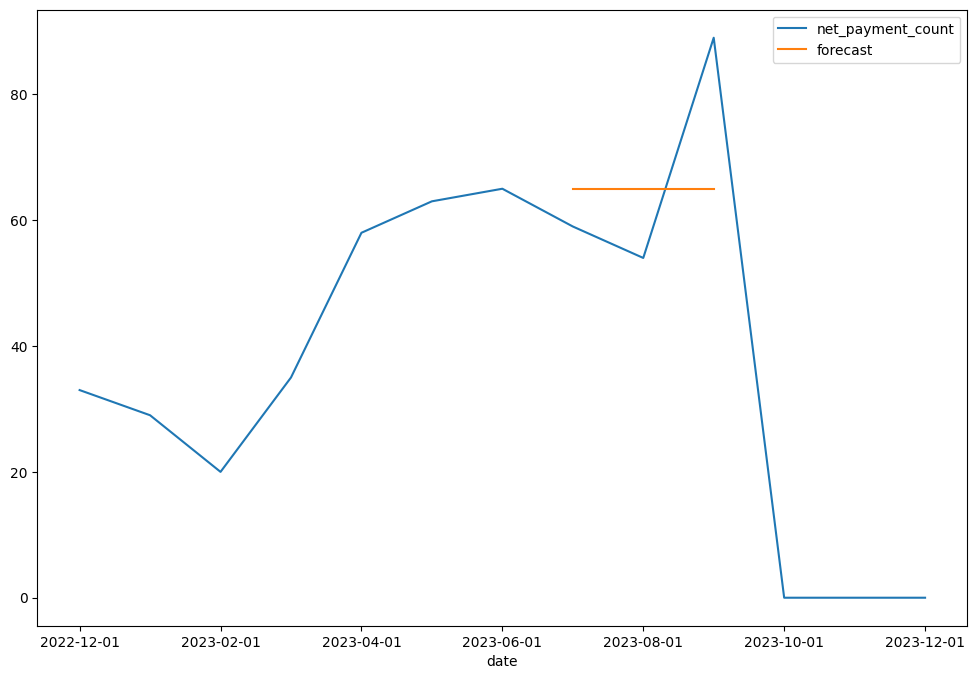

In [63]:
error_merchants=[]
pipeline = TimeSeriesPipeline(data=final_df, merchant_id='merchant_10072', category=1360)
submission, final_df, error_merchants = pipeline.run(months_future=3, submission=submission, final_df=final_df, error_merchants=error_merchants)


In [ ]:
f

final_df[final_df.merchant_id=='merchant_10736']


In [53]:
final_df[final_df.merchant_id=='merchant_10072']


,date,merchant_id,net_payment_count,is_train,category,flag,active_months,max_consecutive
137,2022-12-01,merchant_10072,33.0,True,1360.0,1.0,10.0,10.0
138,2023-01-01,merchant_10072,29.0,True,1360.0,1.0,10.0,10.0
139,2023-02-01,merchant_10072,20.0,True,1360.0,1.0,10.0,10.0
140,2023-03-01,merchant_10072,35.0,True,1360.0,1.0,10.0,10.0
141,2023-04-01,merchant_10072,58.0,True,1360.0,1.0,10.0,10.0
142,2023-05-01,merchant_10072,63.0,True,1360.0,1.0,10.0,10.0
143,2023-06-01,merchant_10072,65.0,True,1360.0,1.0,10.0,10.0
144,2023-07-01,merchant_10072,59.0,True,1360.0,1.0,10.0,10.0
145,2023-08-01,merchant_10072,54.0,True,1360.0,1.0,10.0,10.0
146,2023-09-01,merchant_10072,89.0,True,1360.0,1.0,10.0,10.0


In [60]:
final_df[final_df.category==1360]

,date,merchant_id,net_payment_count,is_train,category,flag,active_months,max_consecutive
137,2022-12-01,merchant_10072,33.0,True,1360.0,1.0,10.0,10.0
138,2023-01-01,merchant_10072,29.0,True,1360.0,1.0,10.0,10.0
139,2023-02-01,merchant_10072,20.0,True,1360.0,1.0,10.0,10.0
140,2023-03-01,merchant_10072,35.0,True,1360.0,1.0,10.0,10.0
141,2023-04-01,merchant_10072,58.0,True,1360.0,1.0,10.0,10.0
...,...,...,...,...,...,...,...,...
202569,2023-08-01,merchant_9027,0.0,True,1360.0,1.0,31.0,27.0
202570,2023-09-01,merchant_9027,5.0,True,1360.0,1.0,31.0,27.0
202571,2023-10-01,merchant_9027,0.0,False,1360.0,1.0,31.0,27.0
202572,2023-11-01,merchant_9027,0.0,False,1360.0,1.0,31.0,27.0


In [54]:
categories=set(final_df.category)

In [10]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from tqdm import tqdm
categories=set(final_df.category)
error_merchants=[]
for category in tqdm(categories, desc='Categories Progress'):
    merchants = final_df.query(f"category=={category}").merchant_id.unique()
    for merchant in merchants:
        pipeline = TimeSeriesPipeline(data=final_df, merchant_id=merchant, category=category)
        submission, final_df, error_merchants = pipeline.run(months_future=3, submission=submission, final_df=final_df, error_merchants=error_merchants)


In [13]:
submission.to_csv('submission_first_stage.csv',index=False)

In [25]:
submission

,category,merchant_id,date,id,month_id,net_payment_count
0,727,merchant_1,2023-10-01,202310merchant_1,2023-10-01,0.000000
1,727,merchant_1,2023-11-01,202311merchant_1,2023-11-01,0.000000
2,727,merchant_1,2023-12-01,202312merchant_1,2023-12-01,0.000000
3,180,merchant_10,2023-10-01,202310merchant_10,2023-10-01,0.000000
4,180,merchant_10,2023-11-01,202311merchant_10,2023-11-01,0.000000
...,...,...,...,...,...,...
78175,476,merchant_9991,2023-11-01,202311merchant_9991,2023-11-01,6.953849
78176,476,merchant_9991,2023-12-01,202312merchant_9991,2023-12-01,21.397732
78177,799,merchant_9993,2023-10-01,202310merchant_9993,2023-10-01,0.000000
78178,799,merchant_9993,2023-11-01,202311merchant_9993,2023-11-01,0.000000


In [15]:
final_df.to_csv('final_df_first_stage.csv',index=False)

In [18]:
error_merchants

['merchant_46022',
 'merchant_43534',
 'merchant_61145',
 'merchant_11272',
 'merchant_55942',
 'merchant_20514',
 'merchant_28488',
 'merchant_37303',
 'merchant_27401',
 'merchant_31772',
 'merchant_3368',
 'merchant_62029',
 'merchant_9652',
 'merchant_57721',
 'merchant_48304',
 'merchant_10025',
 'merchant_20328',
 'merchant_29041',
 'merchant_38253',
 'merchant_56023',
 'merchant_56289',
 'merchant_58149',
 'merchant_62390',
 'merchant_67483',
 'merchant_7430',
 'merchant_9984',
 'merchant_15148',
 'merchant_34046',
 'merchant_34670',
 'merchant_36614',
 'merchant_37023',
 'merchant_47034',
 'merchant_58861',
 'merchant_63796',
 'merchant_27068',
 'merchant_30410',
 'merchant_47197',
 'merchant_22518',
 'merchant_8498',
 'merchant_2214',
 'merchant_2536',
 'merchant_46337',
 'merchant_54200',
 'merchant_9791',
 'merchant_65651',
 'merchant_23298',
 'merchant_13986',
 'merchant_17430',
 'merchant_19602',
 'merchant_20552',
 'merchant_21349',
 'merchant_22336',
 'merchant_24637',
 

In [17]:
error_merchants.to_csv('error_merchants.csv',index=False)

AttributeError: 'list' object has no attribute 'to_csv'

In [19]:
final_df[final_df.merchant_id=='merchant_64316']

,date,merchant_id,net_payment_count,is_train,category,flag,active_months,max_consecutive
183533,2023-09-01,merchant_64316,3.0,True,245.0,1.0,1.0,1.0
183534,2023-10-01,merchant_64316,0.0,False,245.0,1.0,1.0,1.0
183535,2023-11-01,merchant_64316,0.0,False,245.0,1.0,1.0,1.0
183536,2023-12-01,merchant_64316,0.0,False,245.0,1.0,1.0,1.0


In [131]:
final_df.category=final_df.category.astype(int)

In [143]:
categories=set(final_df['category'])

In [1]:
class Lessthen12monthmerchants:
    def __init__(self,data,submission):
        self.data=data
        self.submission=submission


    def split_the_merchants(self,category):

        self.category=category
        self.less12merchants=[]
        self.more12merchants=[]

        # get the merchants in to a list for that category
        subcat_df= self.data[self.data['category']==self.category]
        unique_merchants = subcat_df['merchant_id'].unique()
        merchant_dfs = {merchant: subcat_df[subcat_df['merchant_id'] == merchant] for merchant in unique_merchants}

        # Get unique merchants
        for j in unique_merchants:
            if np.median(merchant_dfs[j]['active_months'].values) <=12 :
                self.less12merchants.append(j)
            else:
                self.more12merchants.append(j)

        return self.less12merchants,self.more12merchants


    def find_corresponding_merchant(self, less12merchant_id):
        if self.more12merchants:
            return self.more12merchants[0]
        else:
            return None

    def forecast_less12_merchants(self):
        forecasts = []

        for less12merchant in self.less12merchants:
            corresponding_merchant = self.find_corresponding_merchant(less12merchant)
            if corresponding_merchant is None:
                continue

            less12_df = self.data[self.data['merchant_id'] == less12merchant]
            more12_df = self.data[self.data['merchant_id'] == corresponding_merchant]

            # Find overlapping dates
            overlapping_dates = less12_df[less12_df['date'].isin(more12_df['date'])]
            ratios = []

            for date in overlapping_dates['date']:
                less12_value = less12_df[less12_df['date'] == date]['net_payment_count'].values[0]
                more12_value = more12_df[more12_df['date'] == date]['net_payment_count'].values[0]
                if more12_value != 0:
                    ratios.append(less12_value / more12_value)

            if ratios:
                avg_ratio = np.mean(ratios)
                forecast_dates = less12_df[pd.isna(less12_df['net_payment_count'])]

                for index, row in forecast_dates.iterrows():
                    forecast_date = row['date']
                    if forecast_date in more12_df['date'].values:
                        more12_forecast = more12_df[more12_df['date'] == forecast_date]['net_payment_count'].values[0]
                        if not pd.isna(more12_forecast):
                            forecast_value = avg_ratio * more12_forecast
                            forecasts.append((less12merchant, forecast_date, forecast_value))

        return forecasts ,ratios

    def run(self, category):
        # Step 1: Split the merchants based on the specified category
        self.split_the_merchants(category)

        # Step 2: Forecast sales for merchants with less than 12 months of data
        forecasts = self.forecast_less12_merchants()

        # Step 3: Process and return the submitted dataframe
        submitted_df = self.submission.copy()
        for merchant_id, forecast_date, forecast_value in forecasts:
            # Update the submission dataframe with the forecasted values
            condition = (submitted_df['merchant_id'] == merchant_id) & (submitted_df['date'] == forecast_date)
            submitted_df.loc[condition, 'forecasted_net_payment_count'] = forecast_value

        return submitted_df


In [ ]:
def forecast_less12_merchants(self):
    forecasts = []
    print("Number of less-than-12-months merchants:", len(self.less12merchants))

    for less12merchant in self.less12merchants:
        corresponding_merchant = self.find_corresponding_merchant(less12merchant)
        if corresponding_merchant is None:
            print(f"No corresponding merchant found for {less12merchant}")
            continue

        less12_df = self.data[self.data['merchant_id'] == less12merchant]
        more12_df = self.data[self.data['merchant_id'] == corresponding_merchant]

        # Find overlapping dates
        overlapping_dates = less12_df[less12_df['date'].isin(more12_df['date'])]
        print(f"Overlapping dates found for {less12merchant}: {len(overlapping_dates)}")

        ratios = []
        for date in overlapping_dates['date']:
            less12_value = less12_df[less12_df['date'] == date]['net_payment_count'].values[0]
            more12_value = more12_df[more12_df['date'] == date]['net_payment_count'].values[0]
            if more12_value != 0:
                ratio = less12_value / more12_value
                ratios.append(ratio)
                print(f"Date: {date}, Less12 Value: {less12_value}, More12 Value: {more12_value}, Ratio: {ratio}")
            else:
                print(f"Date: {date}, More12 Value is zero, skipping ratio calculation.")

        if ratios:
            avg_ratio = np.mean(ratios)
            print(f"Average ratio for {less12merchant}: {avg_ratio}")
            forecast_dates = less12_df[pd.isna(less12_df['net_payment_count'])]

            # ... [rest of the forecasting logic] ...
        else:
            print(f"No valid ratios for merchant {less12merchant}")

    if not forecasts:
        print("No forecasts generated. Check the data and logic.")
    return forecasts

In [2]:
processor = Lessthen12monthmerchants(final_df, submission)
final_submission_df = processor.run(category=2)
    
         

NameError: name 'final_df' is not defined

In [53]:
final_submission_df[final_submission_df['category']==2]

,category,merchant_id,date,id,month_id,net_payment_count
34557,2,merchant_37025,2023-10-01,202310merchant_37025,2023-10-01,11342.374848
34558,2,merchant_37025,2023-11-01,202311merchant_37025,2023-11-01,10887.193962
34559,2,merchant_37025,2023-12-01,202312merchant_37025,2023-12-01,12483.365552
62061,2,merchant_58477,2023-10-01,202310merchant_58477,2023-10-01,2124.000000
62062,2,merchant_58477,2023-11-01,202311merchant_58477,2023-11-01,2124.000000
62063,2,merchant_58477,2023-12-01,202312merchant_58477,2023-12-01,2124.000000


In [26]:
merchant_processor = Lessthen12monthmerchants(data=final_df, submission=submission)

In [30]:
less12merchants, more12merchants = merchant_processor.split_the_merchants(2)

In [34]:
forecasts = merchant_processor.forecast_less12_merchants()

In [35]:
forecasts

[]

In [33]:
less12merchants,more12merchants

(['merchant_58477'], ['merchant_37025'])

In [ ]:
for forecast in forecasts:
    merchant_id, forecast_date, forecast_value = forecast
    # Append this forecast to your submission object
    # The implementation will depend on how your submission object is structured
